In [ ]:
!gdown 1DrxykhLtRDatq2geuuh0PH5RQhPeeoyN


Downloading...
From: https://drive.google.com/uc?id=1DrxykhLtRDatq2geuuh0PH5RQhPeeoyN
To: /content/News_Category_Dataset_v3.json
100% 87.3M/87.3M [00:00<00:00, 143MB/s]


In [ ]:
!pip install -U langchain langchain_community langchain_openai
!pip install transformers torch accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [ ]:
import json
import pandas as pd

news_data = []
with open('News_Category_Dataset_v3.json', 'r') as file:
    for line in file:
        news_data.append(json.loads(line))

df = pd.DataFrame(news_data)
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
df.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [ ]:
news_category = ['U.S. NEWS', 'WORLD NEWS', 'POLITICS', 'BUSINESS', 'MONEY', 'WORLDPOST', 'THE WORLDPOST', 'BLACK VOICES', 'LATINO VOICES', 'IMPACT', 'GOOD NEWS' ]
df_news = df[df['category'].isin(news_category)]

In [ ]:
df_news.reset_index(drop=True, inplace=True)

In [ ]:
df_news.shape

(64864, 6)

In [ ]:
import re

def preprocess_text(text):
    text = re.sub(r"[^\w\s.,!?]", '', text)
    text = " ".join(text.split())
    return text

df_news['headline_cleaned'] = df_news['headline'].apply(preprocess_text)
df_news['short_description_cleaned'] = df_news['short_description'].apply(preprocess_text)

<ipython-input-8-9ef98ea5f6c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['headline_cleaned'] = df_news['headline'].apply(preprocess_text)
<ipython-input-8-9ef98ea5f6c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['short_description_cleaned'] = df_news['short_description'].apply(preprocess_text)


In [ ]:
print(df_news.isnull().sum())
df_news.head()

link                         0
headline                     0
category                     0
short_description            0
authors                      0
date                         0
headline_cleaned             0
short_description_cleaned    0
dtype: int64


,link,headline,category,short_description,authors,date,headline_cleaned,short_description_cleaned
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...
2,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black BirdWatcher Los...,Amy Cooper accused investment firm Franklin Te...
3,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22,Cleaner Was Dead In Belk Bathroom For 4 Days B...,The 63yearold woman was seen working at the So...
4,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22,Reporter Gets Adorable Surprise From Her Boyfr...,Whos that behind you? an anchor for New Yorks ...


# ***USING gpt-4o-mini***

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

import asyncio

# Generate and enter your API key when using LLM.
api_key = ''
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7, api_key=api_key)


In [ ]:
async def analyze_news_article_async(headline, short_description, name):

    print(f"Analyzing Index: {name}")
    prompt_template = """Analyze the sentiment of the following news article:
    News Article:
    Headline: "{headline}"
    Short Description: "{short_description}"

    Provide the following information:
    1. Sentiment (Positive, Neutral, Negative)
    2. Magnitude of sentiment on a scale from 0 to 1, where 0 is neutral and 1 is highly intense.
    """
    prompt = PromptTemplate(
        input_variables=["headline", "short_description"],
        template=prompt_template
    )

    chain = LLMChain(llm=llm, prompt=prompt)
    response = await chain.arun(headline=headline, short_description=short_description)
    print(f"Response for index: {name} is received.")
    return response

def get_sentiment_magnitude(aiMessage):
    try:
        lines = aiMessage.split("\n")
        sentiment = None
        magnitude = None
        for line in lines:
            if "Sentiment" in line:
                sentiment = line.split(":")[-1].strip()
            elif "Magnitude" in line:
                magnitude = line.split(":")[-1].strip()
        return sentiment, magnitude
    except:
        return None, None


In [ ]:
async def dataframe_sentiment_analysis_with_delay(df):
    # batch size - 500 because the gpt-4o-mini has only 500 transactions per minute
    batch_size = 500
    delay_time = 60

    sentiments = []
    magnitudes = []

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i + batch_size]
        tasks = []
        for index, row in batch.iterrows():
            tasks.append(analyze_news_article_async(row['headline_cleaned'], row['short_description_cleaned'], index))


        print(f"Batch {i // batch_size + 1} with {len(batch)} rows.")
        results = await asyncio.gather(*tasks)

        for result in results:
            sentiment, magnitude = get_sentiment_magnitude(result)
            sentiments.append(sentiment)
            magnitudes.append(magnitude)

        if i + batch_size < len(df):
            print(f"Time delay {delay_time} sec as the gpt-4o-mini model has limitation (500 per minute).")
            await asyncio.sleep(delay_time)

    df['Sentiment'] = sentiments
    df['Intensity of Sentiment(0 to 1)'] = magnitudes
    return df



In [ ]:
df_news1 = df_news.iloc[:10000]
df_news2 = df_news.iloc[10000:20000]
df_news3 = df_news.iloc[20000:25000]
df_news4 = df_news.iloc[25000:35000]
df_news5 = df_news.iloc[35000:45000]
df_news6 = df_news.iloc[45000:55000]
df_news7 = df_news.iloc[55000:61000]
df_news8 = df_news.iloc[61000:]

In [ ]:
df_news_with_sentiment8 = await dataframe_sentiment_analysis_with_delay(df_news8)


Batch 1 with 400 rows.
Analyzing Index: 61000


<ipython-input-11-d7c4e850b449>:18: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)
<ipython-input-11-d7c4e850b449>:19: LangChainDeprecationWarning: The method `Chain.arun` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~ainvoke` instead.
  response = await chain.arun(headline=headline, short_description=short_description)


Streaming output truncated to the last 5000 lines.
Analyzing Index: 62540
Analyzing Index: 62541
Analyzing Index: 62542
Analyzing Index: 62543
Analyzing Index: 62544
Analyzing Index: 62545
Analyzing Index: 62546
Analyzing Index: 62547
Analyzing Index: 62548
Analyzing Index: 62549
Analyzing Index: 62550
Analyzing Index: 62551
Analyzing Index: 62552
Analyzing Index: 62553
Analyzing Index: 62554
Analyzing Index: 62555
Analyzing Index: 62556
Analyzing Index: 62557
Analyzing Index: 62558
Analyzing Index: 62559
Analyzing Index: 62560
Analyzing Index: 62561
Analyzing Index: 62562
Analyzing Index: 62563
Analyzing Index: 62564
Analyzing Index: 62565
Analyzing Index: 62566
Analyzing Index: 62567
Analyzing Index: 62568
Analyzing Index: 62569
Analyzing Index: 62570
Analyzing Index: 62571
Analyzing Index: 62572
Analyzing Index: 62573
Analyzing Index: 62574
Analyzing Index: 62575
Analyzing Index: 62576
Analyzing Index: 62577
Analyzing Index: 62578
Analyzing Index: 62579
Analyzing Index: 62580
Analyz

<ipython-input-12-811eeda2e8f1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = sentiments
<ipython-input-12-811eeda2e8f1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intensity of Sentiment(0 to 1)'] = magnitudes


In [ ]:
df_news_with_sentiment8.to_csv('news_sentiment8.csv', index=False)

In [ ]:
news_files = [f"news_sentiment{i}.csv" for i in range(1, 9)]

In [ ]:
df_news_with_sentiment = pd.concat([pd.read_csv(file) for file in news_files], ignore_index=True)


In [ ]:
df_news_with_sentiment.to_csv('news_with_sentiment.csv', index=False)

In [ ]:
import pandas as pd

df_news_with_sentiment = pd.read_csv('news_with_sentiment.csv')

In [ ]:
news_categories = df_news_with_sentiment['category'].unique()

In [ ]:
df_news_with_sentiment.head()

,link,headline,category,short_description,authors,date,headline_cleaned,short_description_cleaned,Sentiment,Intensity of Sentiment(0 to 1)
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,Neutral,0.4
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,** Negative,** 0.7
2,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black BirdWatcher Los...,Amy Cooper accused investment firm Franklin Te...,Negative,0.7
3,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,NaN,2022-09-22,Cleaner Was Dead In Belk Bathroom For 4 Days B...,The 63yearold woman was seen working at the So...,Negative,0.8
4,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22,Reporter Gets Adorable Surprise From Her Boyfr...,Whos that behind you? an anchor for New Yorks ...,** Positive,** 0.7


In [ ]:
df_news_with_sentiment.shape

(36446, 10)

In [ ]:
df_news_with_sentiment['Sentiment'] = df_news_with_sentiment['Sentiment'].str.replace('*', '').str.strip()
df_news_with_sentiment['Intensity of Sentiment(0 to 1)'] = df_news_with_sentiment['Intensity of Sentiment(0 to 1)'].str.replace('*', '').str.strip()

df_news_with_sentiment = df_news_with_sentiment[df_news_with_sentiment['Sentiment'].isin(['Positive', 'Neutral', 'Negative'])]
df_news_with_sentiment['Intensity of Sentiment(0 to 1)'] = pd.to_numeric(df_news_with_sentiment['Intensity of Sentiment(0 to 1)'], errors='coerce')
df_news_with_sentiment = df_news_with_sentiment.dropna(subset=['Intensity of Sentiment(0 to 1)'])

<ipython-input-8-5470d444f73d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_with_sentiment['Intensity of Sentiment(0 to 1)'] = pd.to_numeric(df_news_with_sentiment['Intensity of Sentiment(0 to 1)'], errors='coerce')


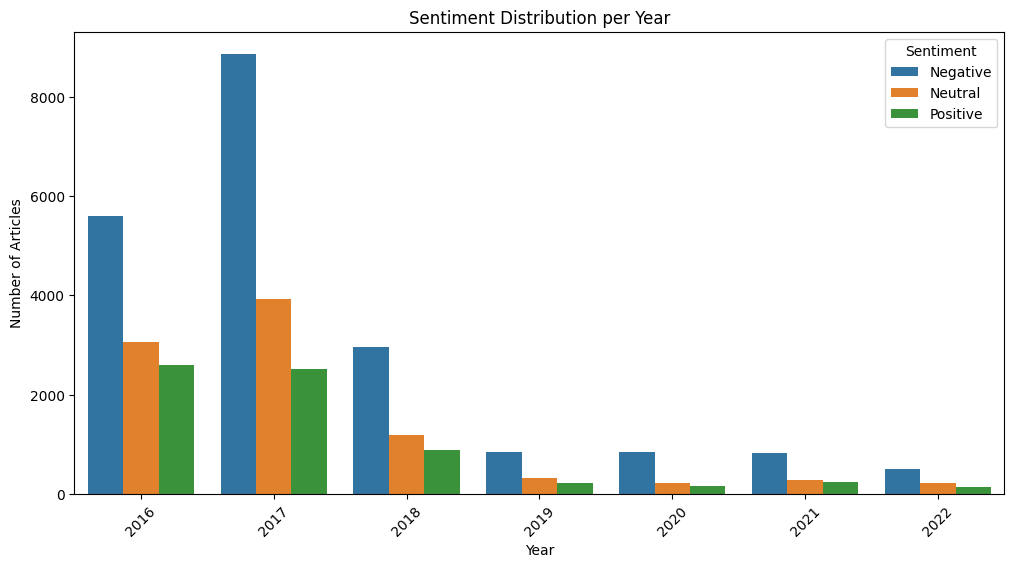

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_news_with_sentiment['date'] = pd.to_datetime(df_news_with_sentiment['date'])

df_news_with_sentiment['year'] = df_news_with_sentiment['date'].dt.year

sentiment_counts_by_year = df_news_with_sentiment.groupby(['year', 'Sentiment']).size().reset_index(name='counts')

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='counts', hue='Sentiment', data=sentiment_counts_by_year)
plt.title('Sentiment Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_news_with_sentiment_yearly = df_news_with_sentiment.copy()
df_news_with_sentiment_yearly['Year'] = pd.to_datetime(df_news_with_sentiment_yearly['date']).dt.year

sentiments = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df_news_with_sentiment_yearly['Sentiment_Score'] = df_news_with_sentiment_yearly['Sentiment'].map(sentiments)

df_news_with_sentiment_yearly['Average_Weighted_Intensity_All_Categories'] = df_news_with_sentiment_yearly['Sentiment_Score'] * df_news_with_sentiment_yearly['Intensity of Sentiment(0 to 1)']

df_news_with_sentiment_yearly = df_news_with_sentiment_yearly.groupby(['Year', 'category'])['Average_Weighted_Intensity_All_Categories'].mean().reset_index()

df_news_with_sentiment_yearly_pivot = df_news_with_sentiment_yearly.pivot(index='Year', columns='category', values='Average_Weighted_Intensity_All_Categories')
df_news_overall_sentiment = df_news_with_sentiment_yearly.groupby('Year')['Average_Weighted_Intensity_All_Categories'].mean().reset_index()

df_news_with_sentiment_yearly = df_news_with_sentiment_yearly_pivot.merge(df_news_overall_sentiment, on='Year', how='left')

In [ ]:
df_news_with_sentiment_yearly.to_csv('news_with_sentiment_yearly.csv', index=False)

In [ ]:
df_news_with_sentiment_yearly.set_index('Year', inplace=True)

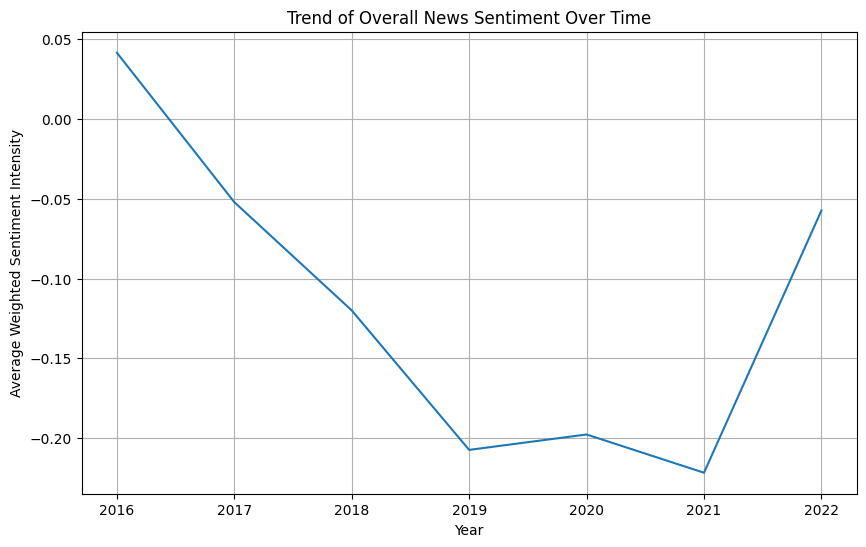

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df_news_overall_sentiment['Year'], df_news_overall_sentiment['Average_Weighted_Intensity_All_Categories'])
plt.xlabel('Year')
plt.ylabel('Average Weighted Sentiment Intensity')
plt.title('Trend of Overall News Sentiment Over Time')
plt.grid(True)
plt.show()

In [ ]:
df_news_with_sentiment_yearly

,BLACK VOICES,BUSINESS,GOOD NEWS,IMPACT,LATINO VOICES,MONEY,POLITICS,THE WORLDPOST,U.S. NEWS,WORLD NEWS,WORLDPOST,Average_Weighted_Intensity_All_Categories
Year,,,,,,,,,,,,
2012,0.357003,-0.212592,NaN,0.339177,NaN,-0.047621,NaN,NaN,NaN,NaN,NaN,0.108992
2013,0.148125,-0.144905,NaN,0.221374,NaN,0.116049,NaN,NaN,NaN,NaN,NaN,0.085161
2014,-0.034834,0.087803,0.631833,0.211405,0.013445,0.090104,-0.226179,NaN,NaN,NaN,-0.289010,0.060571
2015,0.030442,0.166874,0.710412,0.299183,0.040485,NaN,-0.158761,-0.355957,NaN,NaN,-0.227394,0.063161
2016,0.127986,-0.035668,0.698490,0.299078,0.195455,NaN,-0.249463,-0.373874,NaN,NaN,-0.189819,0.059023
2017,0.015987,-0.146552,0.725000,0.128914,0.087708,NaN,-0.337722,-0.362059,NaN,-0.367981,-0.211765,-0.052052
2018,0.082416,-0.469231,NaN,-0.073750,0.142683,0.471429,-0.326517,NaN,-0.404734,-0.381755,NaN,-0.119932
2019,0.091304,-0.514286,NaN,0.020000,NaN,-0.009524,-0.255830,NaN,-0.379336,-0.404011,NaN,-0.207383
2020,0.061538,-0.419444,NaN,0.133333,NaN,0.122222,-0.436097,NaN,-0.423858,-0.421769,NaN,-0.197725


In [ ]:
news_categories_selected = ['BLACK VOICES', 'BUSINESS', 'IMPACT', 'POLITICS', 'Average_Weighted_Intensity_All_Categories']

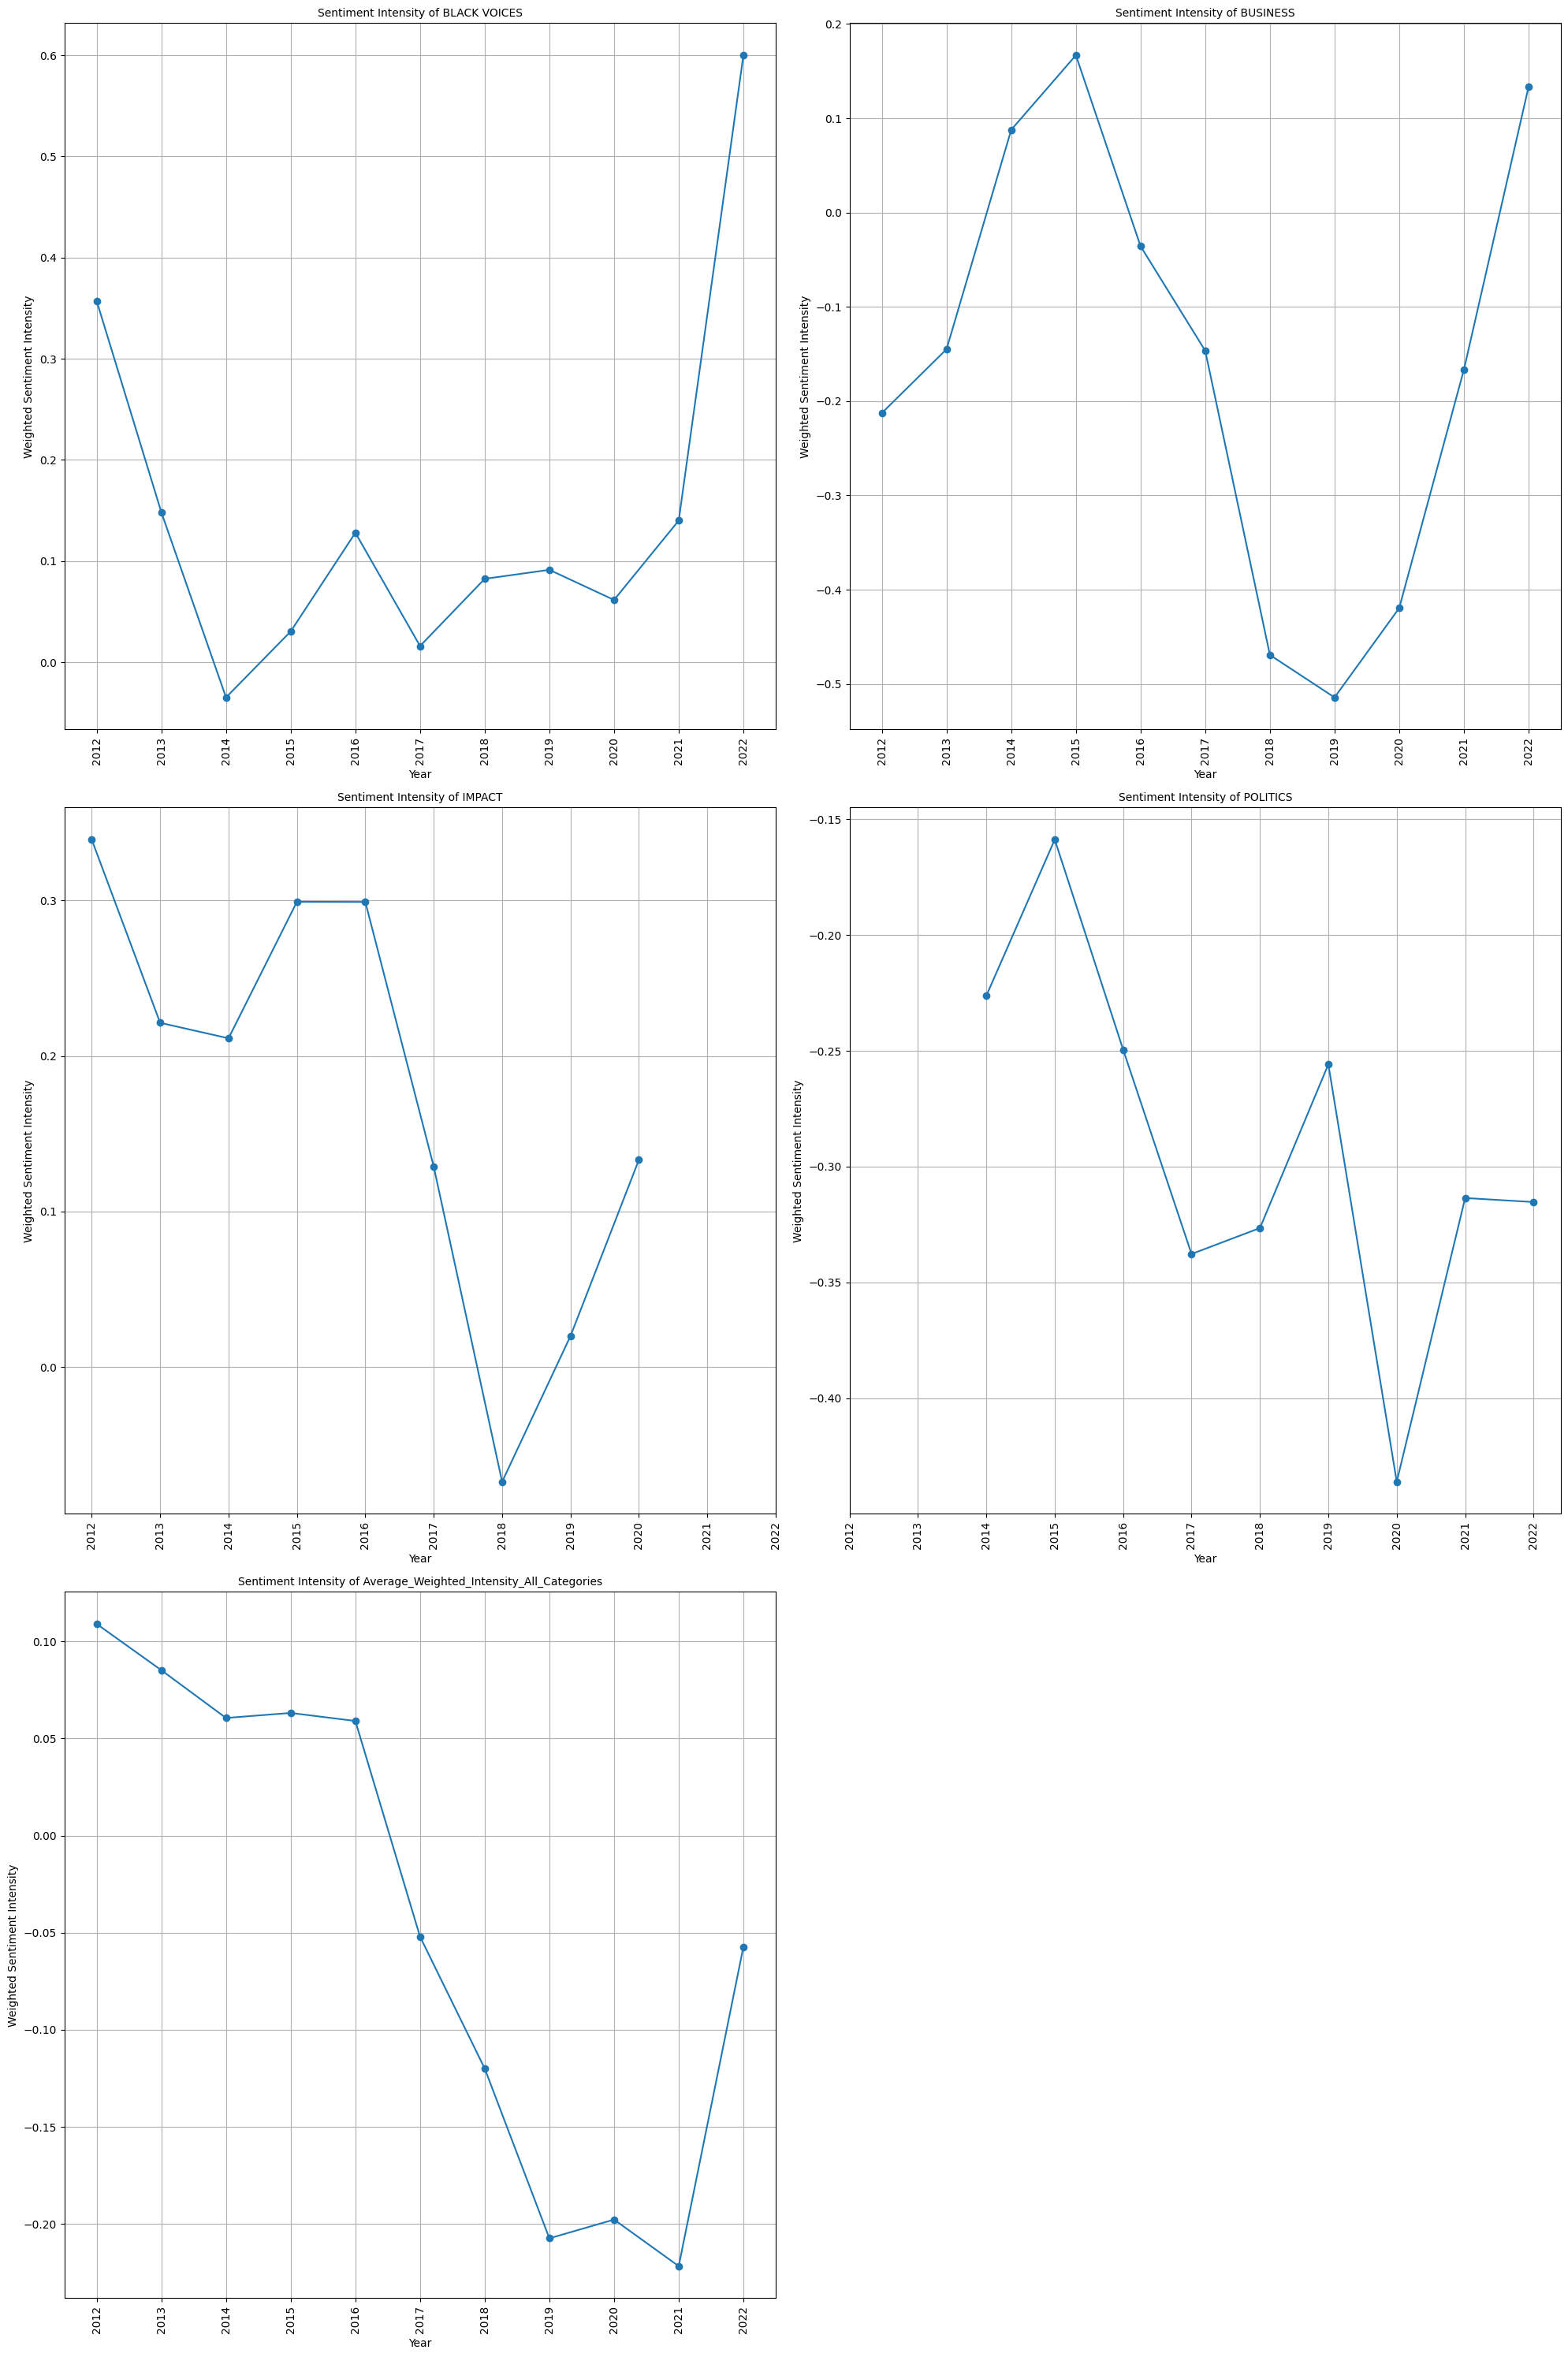

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 30))
for i, feature in enumerate(news_categories_selected, 1):
    plt.subplot(3, 2, i)
    plt.plot(df_news_with_sentiment_yearly.index, df_news_with_sentiment_yearly[feature], marker='o')
    plt.title(f"Sentiment Intensity of {feature}", fontsize=10)
    plt.xticks(df_news_with_sentiment_yearly.index, rotation=90)
    plt.ylabel('Weighted Sentiment Intensity')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
plt.savefig('News Sentiment.png')
plt.show()

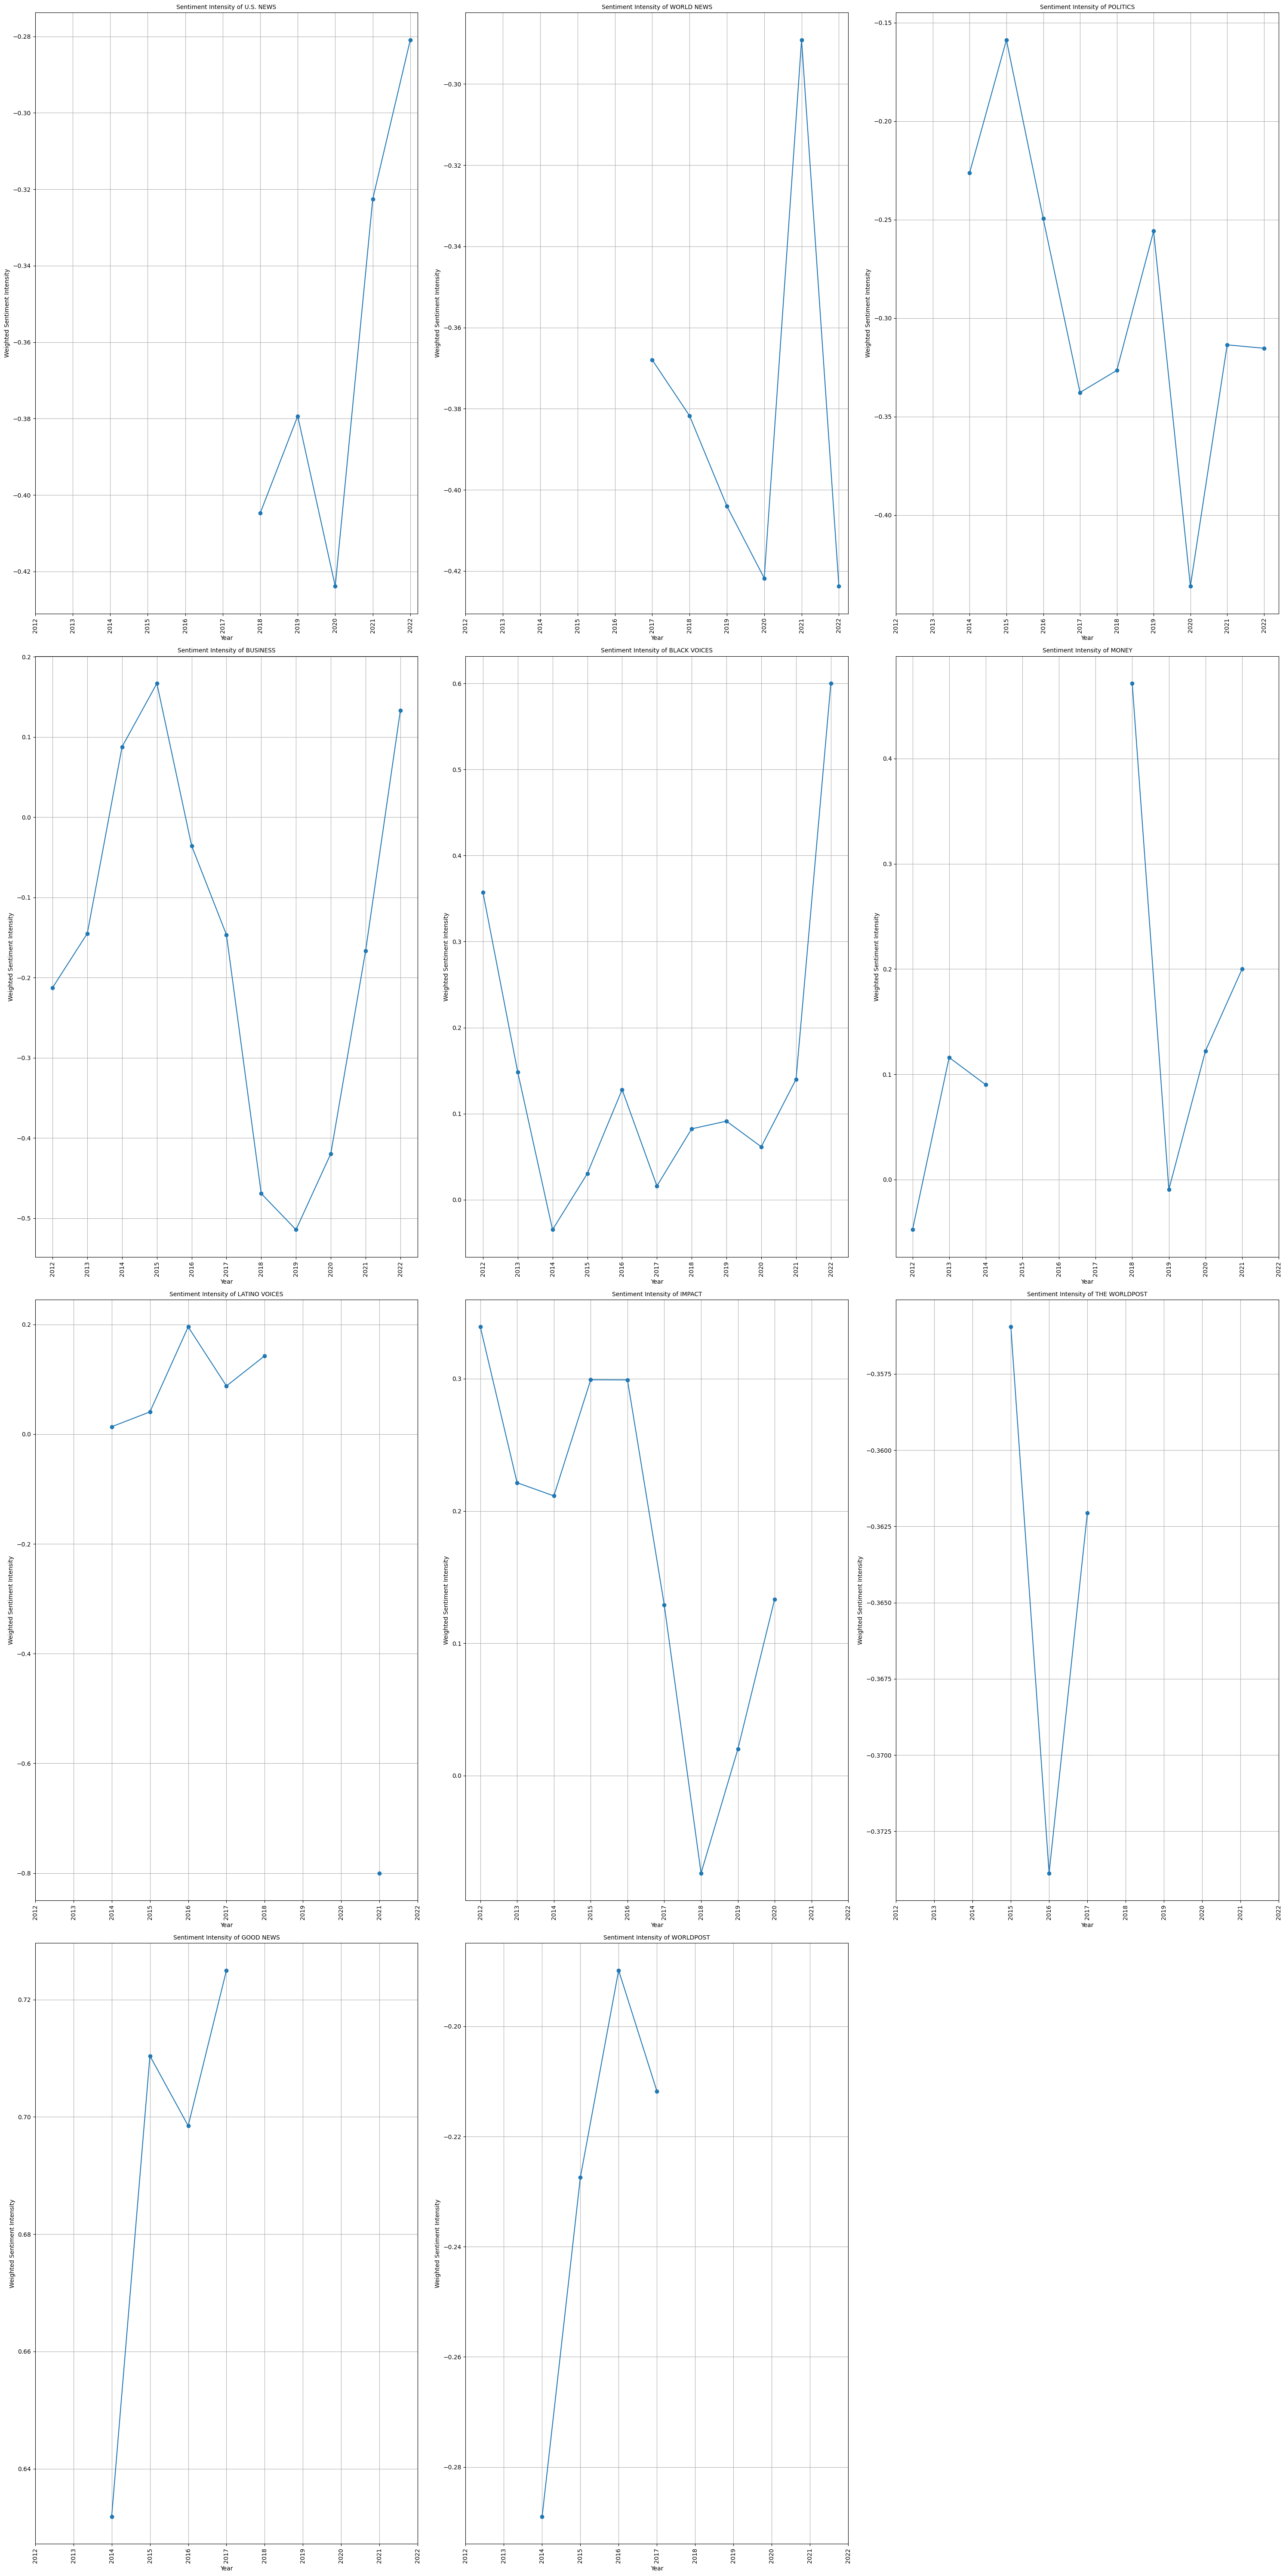

In [ ]:
import matplotlib.pyplot as plt

news_categories_all = df_news_with_sentiment['category'].unique()

plt.figure(figsize=(30, 60))
for i, feature in enumerate(news_categories_all, 1):
    plt.subplot(4, 3, i)
    plt.plot(df_news_with_sentiment_yearly.index, df_news_with_sentiment_yearly[feature], marker='o')
    plt.title(f"Sentiment Intensity of {feature}", fontsize=10)
    plt.xticks(df_news_with_sentiment_yearly.index, rotation=90)
    plt.ylabel('Weighted Sentiment Intensity')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
plt.savefig('News Sentiment2.png')
plt.show()